**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 4.SVD(Singular Value Decomposition)

**SVD**

SVD는 특이값 분해라 불리며, PCA와 유사한 행렬 분해 기법을 사용한다.

PCA는 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬이 아니어도 적용 가능하다.

SVD는 m x n 행렬 $A$를 다음과 같이 분해한다.

$$
A = U\Sigma V^{T}
$$

- $U$: m x m 행렬로 속한 벡터는 특이벡터(Singular Vector)로 서로 직교한다.


- $\Sigma$: m x n 행렬로 대각원소(행렬 $A$의 특이값)만 0이 아니고 나머지 값은 0이다.


- $V^{T}$: n x n 행렬로 속한 벡터는 특이벡터(Singular Vector)로 서로 직교한다.

위 과정을 Full SVD라 하며, 일반적으로는 이를 축약해서 사용한다.

**Compact SVD**

Compact SVD는 Full SVD를 축약한 방법 중 하나로 다음과 같이 분해한다.

- $\Sigma$의 비대각인 부분과 특이값이 0인 부분을 제거한다.


- 이에 대응하는 $U$와 $V$의 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다.


- 즉, $U$: m x p, $\Sigma$: p x p, $V^{T}$: p x n 과 같이 차원이 줄어든다.

**Truncated SVD**

Truncated SVD 역시 Full SVD를 축약한 방법으로 $\Sigma$의 대각원소 중에 상위 몇 개만 추출하는 방식이다.

Compact SVD보다도 더욱 차원을 줄인 방식으로 과정 자체는 Compact SVD와 차이가 없다.

인위적으로 더 작은 차원으로 분해하기 때문에 원본 행렬 복구가 불가능하다.

## 4.1 Full SVD

In [3]:
# a: 4 X 4
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 행렬이 선형독립이게끔 4 x 4 랜덤행렬을 생성하였다.

**numpy 패키지**

In [4]:
# Full SVD
U, Sigma, Vt = np.linalg.svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print("-"*35)
print('U matrix:\n',np.round(U, 3))
print("-"*35)
print('Sigma Value:\n',np.round(Sigma, 3))
print("-"*35)
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
-----------------------------------
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
-----------------------------------
Sigma Value:
 [3.423 2.023 0.463 0.079]
-----------------------------------
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- `np.linalg.svd()`에 행렬을 입력하면 $U$, $\Sigma$, $V^{T}$를 반환해준다.


- $\Sigma$의 경우 대각원소 값만 표현하여 1차원 행렬로 반환된다.

**scipy 패키지**

In [5]:
import scipy

# Full SVD
U, Sigma, Vt = scipy.linalg.svd(a, full_matrices=True)

print(U.shape, Sigma.shape, Vt.shape)
print("-"*35)
print('U matrix:\n',np.round(U, 3))
print("-"*35)
print('Sigma Value:\n',np.round(Sigma, 3))
print("-"*35)
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
-----------------------------------
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
-----------------------------------
Sigma Value:
 [3.423 2.023 0.463 0.079]
-----------------------------------
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- `numpy`패키지 뿐 아니라 `scipy`패키지의 `scipy.linalg.svd()`를 이용하여 Full SVD 수행이 가능하다.

In [6]:
# Sigma 행렬 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)

# a 행렬 되돌리기
a_ = U @ Sigma_mat @ Vt
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- $\Sigma$를 2차원으로 바꿔준 후 행렬을 곱하여 원래의 행렬이 만들어짐을 확인하였다.

In [7]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- 행렬이 선형종속이게끔 세 번째 행을 첫 번째 행 + 두 번째 행, 네 번째 행은 첫 번째 행과 같게 만든다.

In [8]:
# Full SVD
U, Sigma, Vt = np.linalg.svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print("-"*35)
print('U matrix:\n',np.round(U, 3))
print("-"*35)
print('Sigma Value:\n',np.round(Sigma, 3))
print("-"*35)
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
-----------------------------------
U matrix:
 [[ 0.246  0.583 -0.071 -0.771]
 [-0.774 -0.017  0.551 -0.31 ]
 [-0.529  0.566 -0.551  0.31 ]
 [ 0.246  0.583  0.623  0.461]]
-----------------------------------
Sigma Value:
 [2.663 0.807 0.    0.   ]
-----------------------------------
V transpose matrix:
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.703 -0.444  0.056  0.553]
 [-0.129  0.659 -0.606  0.426]]


- 선형종속인 행렬을 다시 SVD분해하였을 때, $\Sigma$의 랭크가 2로 감소되었다.


- 이를 다시 원본 행렬로 복원하되 전체 데이터가 아닌 대각원소가 있는 경우만을 포함해보자.

In [9]:
# U_: Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]

# Sigma_: 대각원소가 존재하는 부분만 추출
Sigma_ = np.diag(Sigma[:2])

# Vt_: Sigma의 앞 2행에 대응되는 앞 2행만 추출
Vt_ = Vt[:2, :]

print(U_.shape, Sigma_.shape, Vt_.shape)
print("-"*35)

# a_ 행렬 되돌리기
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
-----------------------------------
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- 원본 행렬이 잘 복원되었다.


- 이는 Compact SVD 방식으로 복원되었다고 생각하면 될 듯 하다.

## 4.2 Truncated SVD

In [10]:
# matrix: 6 x 5
np.random.seed(121)
matrix = np.random.random((6, 5))
print(matrix)

[[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814]
 [0.40791941 0.5557906  0.74552394 0.24849976 0.9686594 ]
 [0.95268418 0.48984885 0.01829731 0.85760612 0.40493829]
 [0.62247394 0.29537149 0.92958852 0.4056155  0.56730065]
 [0.24575605 0.22573721 0.03827786 0.58098021 0.82925331]
 [0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]]


**scipy 패키지**

In [11]:
from scipy.sparse.linalg import svds

# Truncated SVD
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)

print('Truncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('Truncated SVD Sigma값 행렬:', Sigma_tr)

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 5)
Truncated SVD Sigma값 행렬: [0.38255758 0.77828423 0.97971693 3.02855319]


- `scipy.sparse.linalg`패키지의 `svds()`를 이용해서 Truncated SVD를 수행 가능하다.

In [12]:
# matrix 되돌리기
matrix_tr = U_tr @ np.diag(Sigma_tr) @ Vt_tr
print('nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

nTruncated SVD로 분해 후 복원 행렬:
 [[0.0705565  0.21415534 0.24963208 0.1957102  0.81723789]
 [0.36768743 0.5591333  0.76197182 0.29168327 0.95589127]
 [0.90633052 0.49370017 0.03724788 0.9073604  0.39022737]
 [0.63790101 0.29408972 0.92328154 0.38905666 0.57219663]
 [0.30718373 0.22063345 0.01316463 0.51504603 0.84874816]
 [0.81143082 0.94376726 0.72071921 0.63231437 0.75728494]]


- Truncated SVD 방법은 $\Sigma$의 대각원소가 0이 아니어도 제외한다.


- 따라서 행렬 복원시 완벽하게 복원되지 않고 근사적으로 복원된다.

## 4.3 PCA/TSVD

### 4.3.1 피처 스케일링 전 비교

In [13]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris

iris = load_iris()
iris_ftrs = iris.data

# TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# PCA 변환
pca = PCA(n_components=2)
pca.fit(iris_ftrs)
iris_pca = pca.transform(iris_ftrs)

# 데이터 프레임 생성
iris_df = pd.DataFrame(np.concatenate([iris_tsvd, iris_pca], axis=1))
iris_df.columns = ["TSVD_C1", "TSVD_C2", "PCA_C1", "PCA_C2"]
iris_df["target"] = iris.target

iris_df.head()

,TSVD_C1,TSVD_C2,PCA_C1,PCA_C2,target
0,5.912747,2.302033,-2.684126,0.319397,0
1,5.572482,1.971826,-2.714142,-0.177001,0
2,5.446977,2.095206,-2.888991,-0.144949,0
3,5.436459,1.870382,-2.745343,-0.318299,0
4,5.875645,2.328290,-2.728717,0.326755,0


- `sklearn.decomposition`패키지의 `TruncatedSVD()`는 $U$, $\Sigma$, $V^{T}$를 반환하진 않는다.


- `PCA()`처럼 `fit()`, `transform()`으로 원본 데이터를 주요 컴포넌트로 차원을 축소하여 변환해준다.

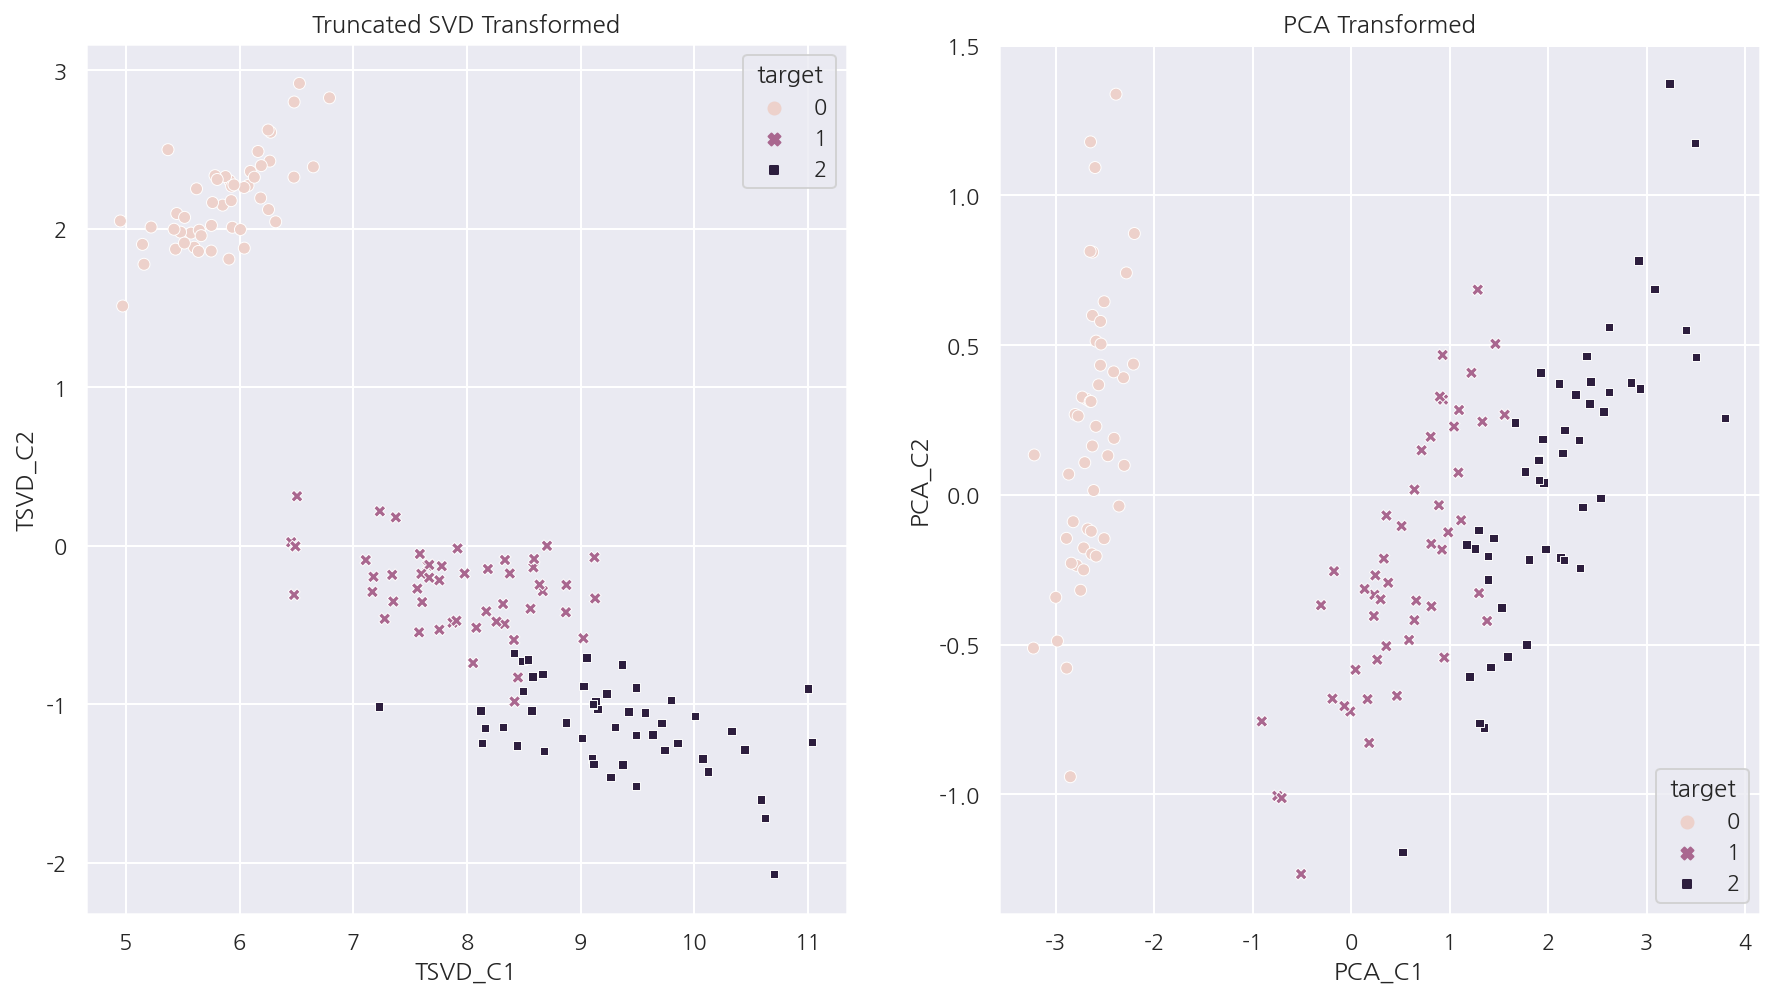

In [14]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

# Truncated SVD 컴포넌트 시각화
sns.scatterplot(x="TSVD_C1", y="TSVD_C2", data=iris_df, 
                hue= "target", style = "target", ax = axs[0])
axs[0].set_title('Truncated SVD Transformed')

# PCA 컴포넌트 시각화
sns.scatterplot(x="PCA_C1", y="PCA_C2", data=iris_df, 
                hue= "target", style = "target", ax = axs[1])
axs[1].set_title('PCA Transformed')

plt.show()

- Truncated SVD 그래프를 보면 TSVD_C2 축을 기반으로 모든 붓꽃 품종이 어느정도 잘 분류된다.


- Truncated SVD 역시 PCA처럼 어느 정도 분류가 가능하게끔 차원을 축소한다는 것을 알 수 있다.

### 4.3.2 피처 스케일링 후 비교

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 피처 스케일링
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# PCA 변환
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# 데이터 프레임 생성
iris_fin = pd.DataFrame(np.concatenate([iris_tsvd, iris_pca], axis=1))
iris_fin.columns = ["TSVD_C1", "TSVD_C2", "PCA_C1", "PCA_C2"]
iris_fin["target"] = iris.target

iris_fin.head()

,TSVD_C1,TSVD_C2,PCA_C1,PCA_C2,target
0,-2.264703,0.480027,-2.264703,0.480027,0
1,-2.080961,-0.674134,-2.080961,-0.674134,0
2,-2.364229,-0.341908,-2.364229,-0.341908,0
3,-2.299384,-0.597395,-2.299384,-0.597395,0
4,-2.389842,0.646835,-2.389842,0.646835,0


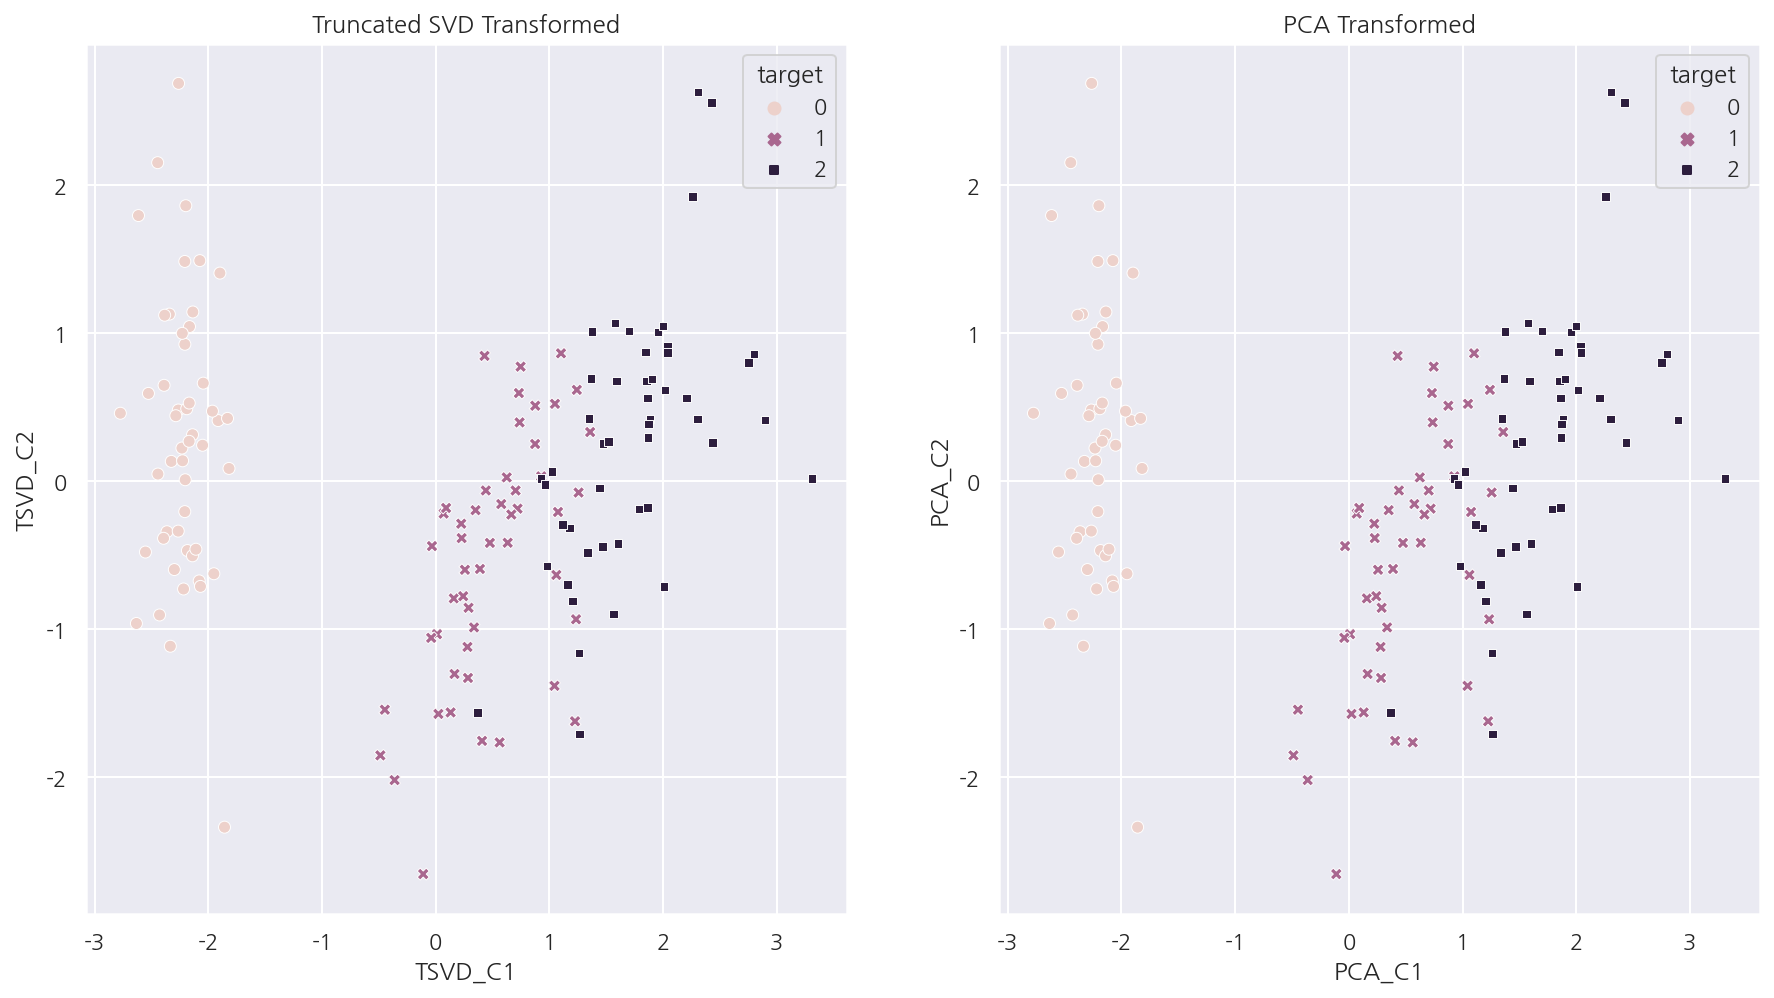

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

# Truncated SVD 컴포넌트 시각화
sns.scatterplot(x="TSVD_C1", y="TSVD_C2", data=iris_fin, 
                hue= "target", style = "target", ax = axs[0])
axs[0].set_title('Truncated SVD Transformed')

# PCA 컴포넌트 시각화
sns.scatterplot(x="PCA_C1", y="PCA_C2", data=iris_fin, 
                hue= "target", style = "target", ax = axs[1])
axs[1].set_title('PCA Transformed')

plt.show()

- 피처 스케일링 이후 Truncated SVD와 PCA로 컴포넌트를 구한 후 시각화 하였다.


- 두 방법의 결과가 거의 동일함을 알 수 있다.

In [17]:
# 두 방법의 컴포넌트 차이 평균
var1 = (iris_pca - iris_tsvd).mean()
print(f"{var1:.3f}")

# 원본 피처별 컴포넌트 비율 차이 평균
var2 = (pca.components_ - tsvd.components_).mean()
print(f"{var2:.3f}")

0.000
-0.000


- 직접 컴포넌트 값의 차이와 원본 피처별 컴포넌트 비율 값의 차이를 계산하였다.


- 모두 0에 가까운 값으로 두 방법의 결과가 동일함을 알 수 있다.


- 즉, 데이터 스케일링을 통해 데이터 중심이 동일해지면 두 방법은 동일한 변환값을 반환한다.